<a href="https://colab.research.google.com/github/DanishJameel/Open_source/blob/main/Multi_Regression_Insurance_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [ ]:
# Load the dataset
df = pd.read_csv("/content/insurance.csv")


In [ ]:
# Check for missing values
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:

# Check for duplicate rows
print(df.duplicated().sum())


0


In [ ]:

# Remove duplicates
df = df.drop_duplicates()



In [ ]:
# Check for outliers
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
df = df[(df['charges'] < upper_bound) & (df['charges'] > lower_bound)]


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
# Convert categorical variables to numeric
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,southwest,11411.68500
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350


In [ ]:
# One-hot encode the region variable
df = pd.get_dummies(df, columns=['region'])


In [ ]:
# Remove unnecessary columns
df = df.drop(['region_northeast', 'region_southeast', 'region_southwest'], axis=1)

In [ ]:
# Rename columns for consistency
df = df.rename(columns={'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region_northwest': 'Northwest', 'charges': 'Charges'})

In [ ]:
df

,Age,Sex,BMI,Children,Smoker,Charges,Northwest
0,19,0,27.900,0,1,16884.92400,0
1,18,1,33.770,1,0,1725.55230,0
2,28,1,33.000,3,0,4449.46200,0
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,11411.68500,0
1333,50,1,30.970,3,0,10600.54830,1
1334,18,0,31.920,0,0,2205.98080,0
1335,18,0,36.850,0,0,1629.83350,0


In [ ]:
# Save cleaned dataset
df.to_csv("insurance_cleaned.csv", index=False)

In [ ]:
df = pd.read_csv("/content/insurance_cleaned.csv")

In [ ]:
df

,Age,Sex,BMI,Children,Smoker,Charges,Northwest
0,19,0,27.900,0,1,16884.92400,0
1,18,1,33.770,1,0,1725.55230,0
2,28,1,33.000,3,0,4449.46200,0
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...,...
1138,52,0,44.700,3,0,11411.68500,0
1139,50,1,30.970,3,0,10600.54830,1
1140,18,0,31.920,0,0,2205.98080,0
1141,18,0,36.850,0,0,1629.83350,0


In [ ]:
data = df
# Data Cleaning
# Change column names to lowercase
data.columns = map(str.lower, data.columns)

# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
dtype: int64


In [ ]:
# Explore the data
# Descriptive statistics
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
                age          sex          bmi     children       smoker  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean     38.700787     0.489064    30.102104     1.091864     0.095363   
std      13.849632     0.500099     6.075323     1.220575     0.293844   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      26.000000     0.000000    25.745000     0.000000     0.000000   
50%      39.000000     0.000000    29.700000     1.000000     0.000000   
75%      50.500000     1.000000    33.915000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges    northwest  
count   1143.000000  1143.000000  
mean    8982.866399     0.248469  
std     5900.474985     0.432314  
min     1121.873900     0.000000  
25%     4252.167025     0.000000  
50%     8026.666600     0.000000  
75%    12227.982225     0.000000  
max    25678.778450     1.00

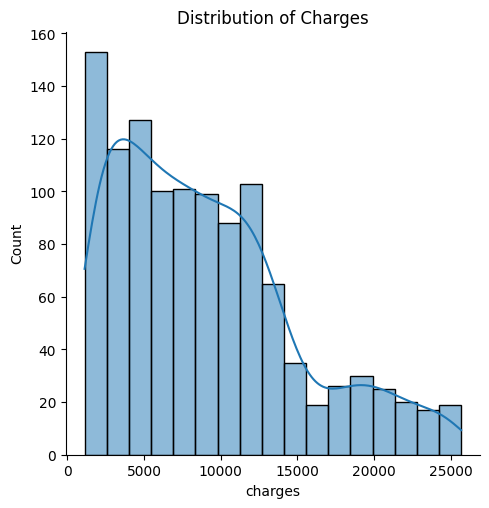

In [ ]:
# Distribution of charges
sns.displot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

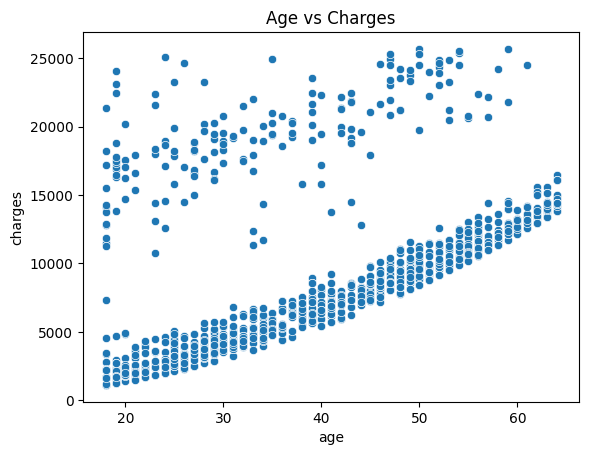

In [ ]:
# Relationship between age and charges
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Charges')
plt.show()


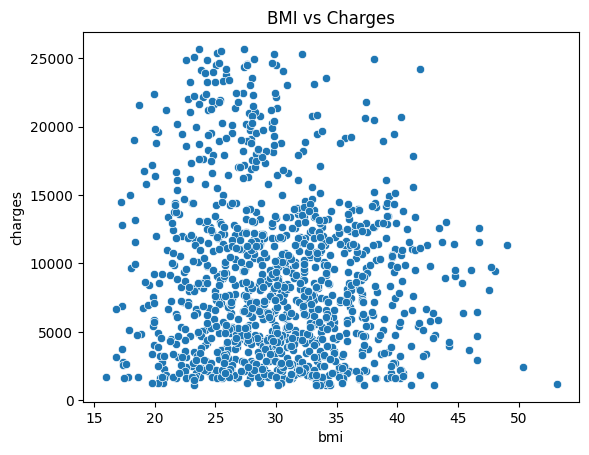

In [ ]:
# Relationship between bmi and charges
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.show()


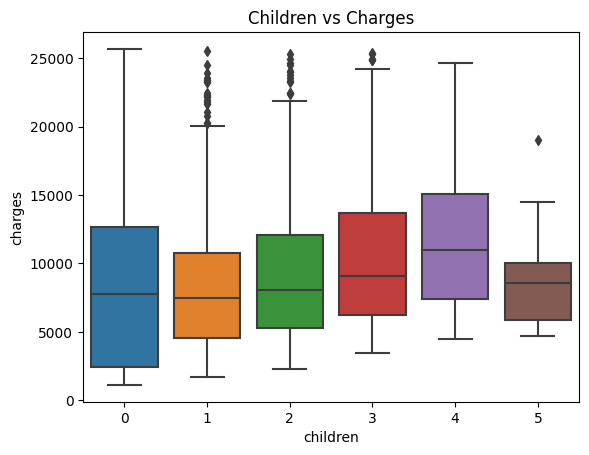

In [ ]:
# Relationship between children and charges
sns.boxplot(x='children', y='charges', data=data)
plt.title('Children vs Charges')
plt.show()

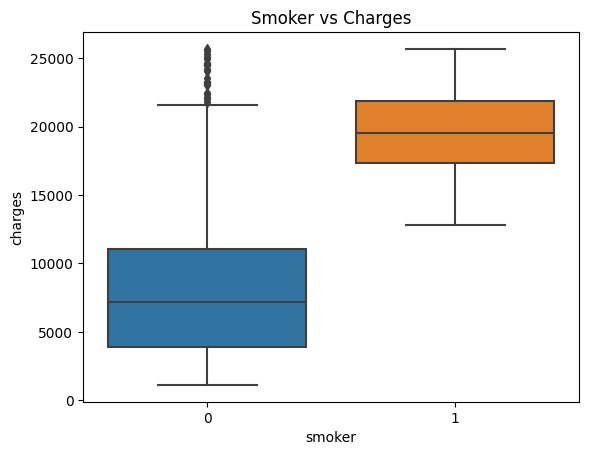

In [ ]:
# Relationship between smoker and charges
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoker vs Charges')
plt.show()


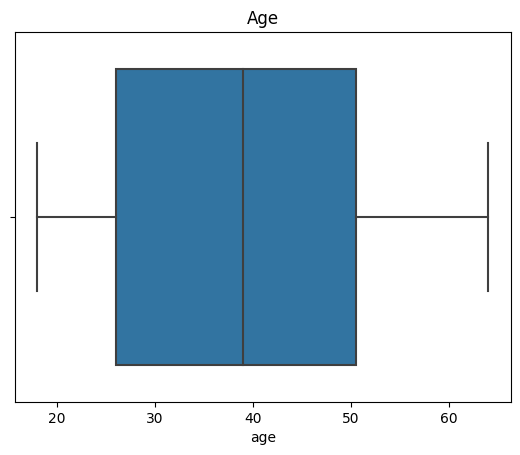

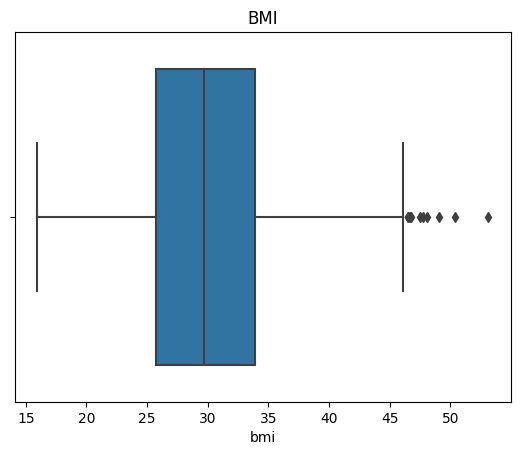

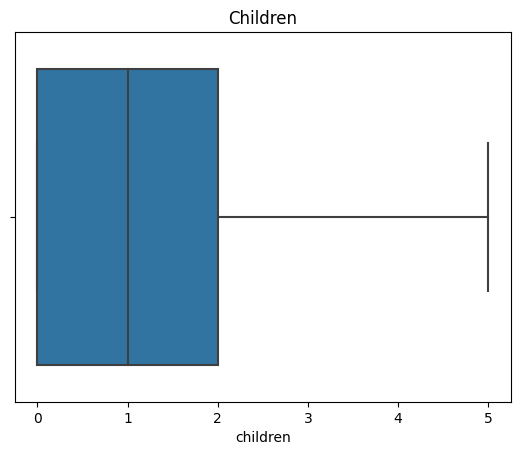

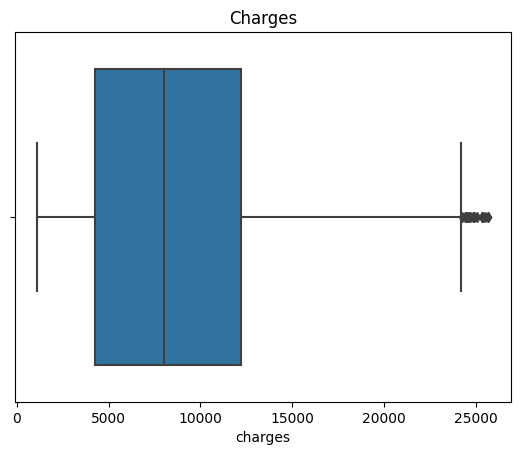

In [ ]:
sns.boxplot(x='age', data=data)
plt.title('Age')
plt.show()

sns.boxplot(x='bmi', data=data)
plt.title('BMI')
plt.show()

sns.boxplot(x='children', data=data)
plt.title('Children')
plt.show()

sns.boxplot(x='charges', data=data)
plt.title('Charges')
plt.show()

In [ ]:
data


,age,sex,bmi,children,smoker,charges,northwest
0,19,0,27.900,0,1,16884.92400,0
1,18,1,33.770,1,0,1725.55230,0
2,28,1,33.000,3,0,4449.46200,0
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...,...
1138,52,0,44.700,3,0,11411.68500,0
1139,50,1,30.970,3,0,10600.54830,1
1140,18,0,31.920,0,0,2205.98080,0
1141,18,0,36.850,0,0,1629.83350,0


In [ ]:
import statsmodels.api as sm

# Define the independent variables
X = data[['age', 'bmi', 'sex', 'children', 'smoker', 'northwest']]

# Define the dependent variable
y = data['charges']

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     381.9
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          2.81e-268
Time:                        11:09:53   Log-Likelihood:                -10915.
No. Observations:                1143   AIC:                         2.184e+04
Df Residuals:                    1136   BIC:                         2.188e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2150.2881    607.652     -3.539      0.0

In [ ]:
# Importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
lr_model = LinearRegression()

# Fitting the model to the training data
lr_model.fit(X_train, y_train)

# Predicting the insurance cost for the test set
y_pred = lr_model.predict(X_test)

# Evaluating the performance of the model using R-squared metric
lr_r2_score = r2_score(y_test, y_pred)
print("R-squared score for Linear Regression model: ", lr_r2_score)


R-squared score for Linear Regression model:  0.6391460044312998


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a dictionary of regression models
models = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(),
          'Lasso Regression': Lasso(),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Random Forest Regression': RandomForestRegressor(),
          'Gradient Boosting Regression': GradientBoostingRegressor(),
          'XGBoost Regression': XGBRegressor(),
          'Support Vector Regression': SVR()}

# Fitting and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(name + ' MSE: {:.4f}'.format(mse))


Linear Regression MSE: 12978603.8150
Ridge Regression MSE: 12960820.1199
Lasso Regression MSE: 12976520.9152
Decision Tree Regression MSE: 30059657.3208
Random Forest Regression MSE: 14496620.0862
Gradient Boosting Regression MSE: 13049017.1170
XGBoost Regression MSE: 17870397.0005
Support Vector Regression MSE: 39321275.3685


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost Regression": XGBRegressor(),
    "Support Vector Regression": SVR(),
}

# loop through each model and calculate accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")


Linear Regression accuracy: 0.6391460044312998
Ridge Regression accuracy: 0.6396404580354673
Lasso Regression accuracy: 0.639203916879443
Decision Tree Regression accuracy: 0.1726833122319298
Random Forest Regression accuracy: 0.6000181885291558
Gradient Boosting Regression accuracy: 0.6387415178686997
XGBoost Regression accuracy: 0.5031357569771318
Support Vector Regression accuracy: -0.09327933342083239


Linear Regression accuracy: 0.6391460044312998
Ridge Regression accuracy: 0.6396404580354673
Lasso Regression accuracy: 0.639203916879443
Decision Tree Regression accuracy: 0.16206985618477632
Random Forest Regression accuracy: 0.5972571798473112
Gradient Boosting Regression accuracy: 0.6368795317340331
XGBoost Regression accuracy: 0.5031357569771318
Support Vector Regression accuracy: -0.09327933342083239


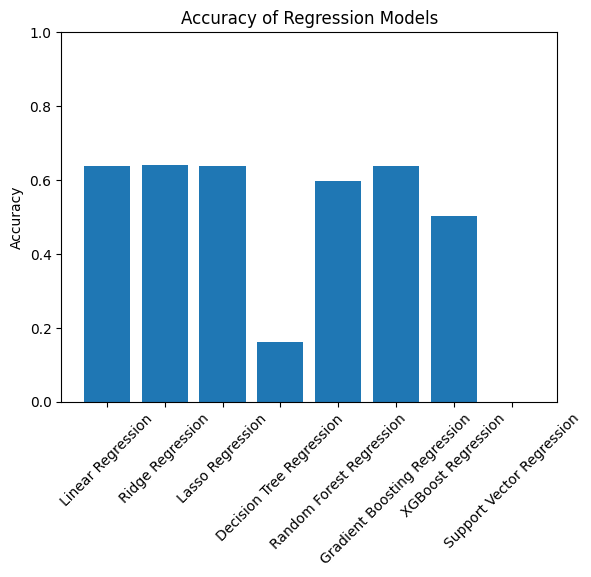

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost Regression": XGBRegressor(),
    "Support Vector Regression": SVR(),
}

# loop through each model and calculate accuracy
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} accuracy: {accuracy}")

# plot the accuracies
plt.bar(np.arange(len(models)), accuracies)
plt.xticks(np.arange(len(models)), models.keys(), rotation=45)
plt.ylim([0, 1])
plt.ylabel("Accuracy")
plt.title("Accuracy of Regression Models")
plt.show()


In [ ]:
# loop through each model and calculate accuracy
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} accuracy: {accuracy*100}")

Linear Regression accuracy: 63.91460044312998
Ridge Regression accuracy: 63.96404580354673
Lasso Regression accuracy: 63.9203916879443
Decision Tree Regression accuracy: 18.440221276459578
Random Forest Regression accuracy: 59.73330017332623
Gradient Boosting Regression accuracy: 63.95753335727271
XGBoost Regression accuracy: 50.313575697713176
Support Vector Regression accuracy: -9.327933342083238


Linear Regression accuracy: 63.91460044312998
Ridge Regression accuracy: 63.96404580354673
Lasso Regression accuracy: 63.9203916879443
Decision Tree Regression accuracy: 16.74137520855633
Random Forest Regression accuracy: 60.40208906658342
Gradient Boosting Regression accuracy: 63.487041414333056
XGBoost Regression accuracy: 50.313575697713176
Support Vector Regression accuracy: -9.327933342083238


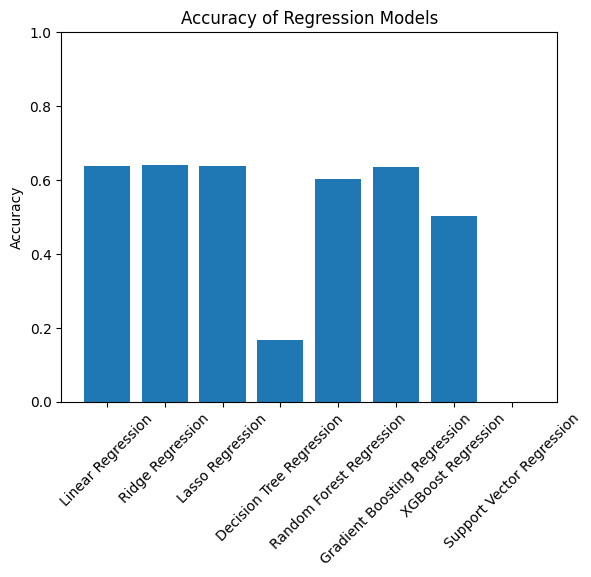

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost Regression": XGBRegressor(),
    "Support Vector Regression": SVR(),
}

# loop through each model and calculate accuracy
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} accuracy: {accuracy*100}")

# plot the accuracies
plt.bar(np.arange(len(models)), accuracies)
plt.xticks(np.arange(len(models)), models.keys(), rotation=45)
plt.ylim([0, 1])
plt.ylabel("Accuracy")
plt.title("Accuracy of Regression Models")
plt.show()


Linear Regression MSE: 12978603.8150
Ridge Regression MSE: 12960820.1199
Lasso Regression MSE: 12976520.9152
Decision Tree Regression MSE: 29987859.8251
Random Forest Regression MSE: 14440810.4042
Gradient Boosting Regression MSE: 13008978.8816
XGBoost Regression MSE: 17870397.0005
Support Vector Regression MSE: 39321275.3685


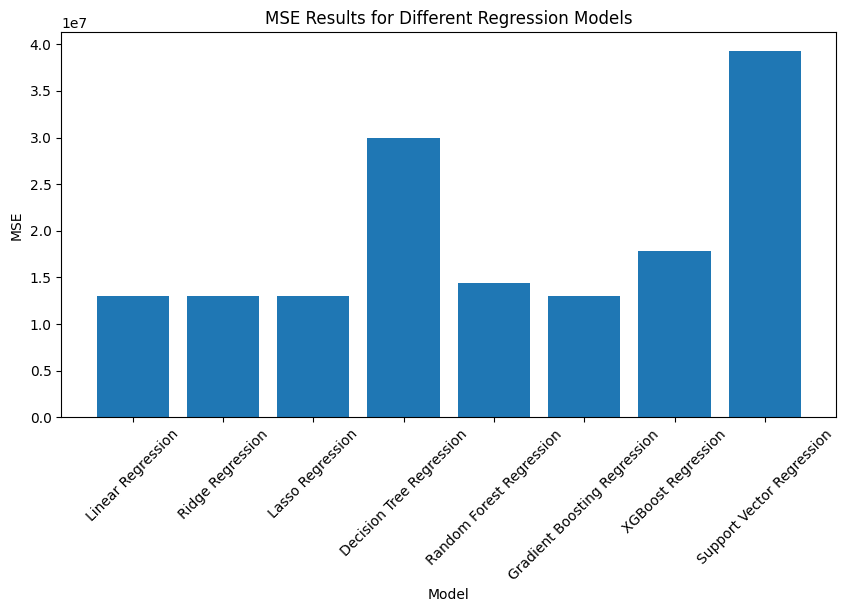

In [ ]:
import matplotlib.pyplot as plt

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a dictionary of regression models
models = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(),
          'Lasso Regression': Lasso(),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Random Forest Regression': RandomForestRegressor(),
          'Gradient Boosting Regression': GradientBoostingRegressor(),
          'XGBoost Regression': XGBRegressor(),
          'Support Vector Regression': SVR()}

# Fitting and evaluating each model
mse_results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    print(name + ' MSE: {:.4f}'.format(mse))

# Plotting the MSE results
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), mse_results)
plt.xticks(rotation=45)
plt.title('MSE Results for Different Regression Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()
